In [1]:
from Samplers.gibbs_sampler import *
from Samplers.plotting import *

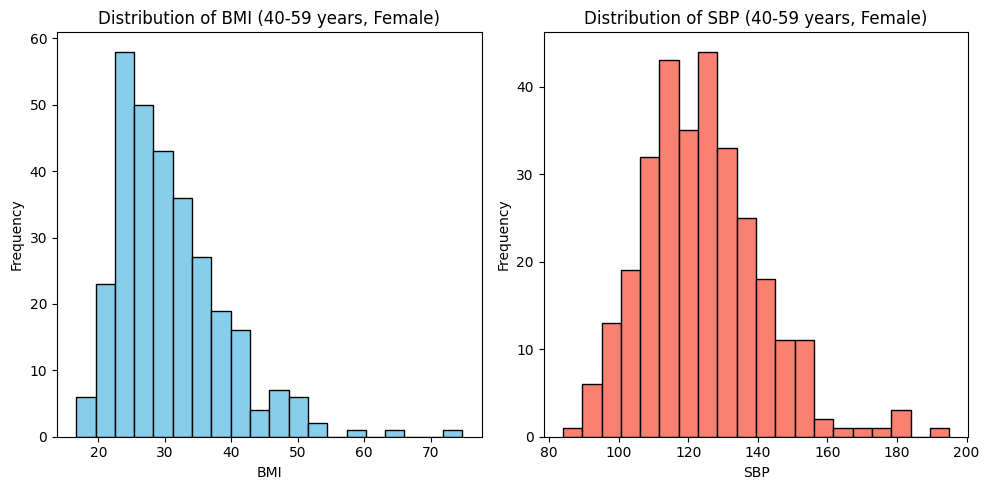

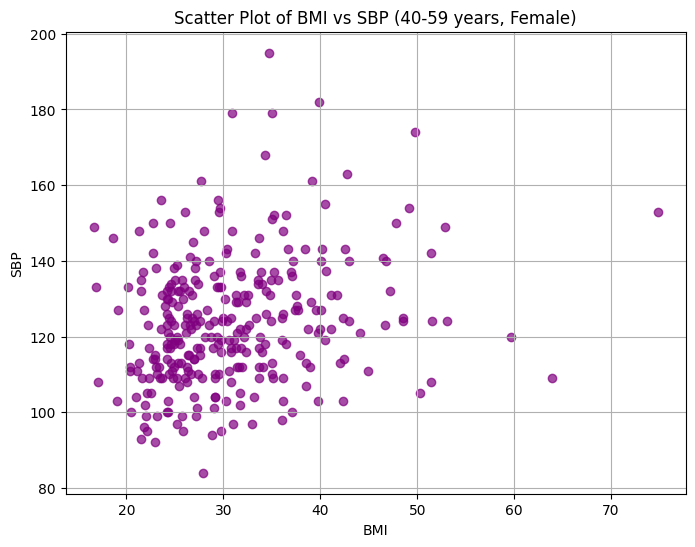

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invwishart, dirichlet
from tqdm import tqdm
import matplotlib.patches as patches
import matplotlib.pyplot as plt

data = pd.read_csv('data/NHANES_adults_data_preprocessed.csv')
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
cleaned_data = filtered_data[
    (filtered_data['bmi'] >= 10) & (filtered_data['bmi'] <= 80) &
    (filtered_data['sbp'] >= 70) & (filtered_data['sbp'] <= 270)
]
bmi_sbp_data = cleaned_data[['bmi', 'sbp']].sample(300, random_state=0)

# Plot BMI and SBP distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bmi_sbp_data['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bmi_sbp_data['sbp'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of SBP (40-59 years, Female)')
plt.xlabel('SBP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot between BMI and SBP
plt.figure(figsize=(8, 6))
plt.scatter(bmi_sbp_data['bmi'], bmi_sbp_data['sbp'], alpha=0.7, color='purple')
plt.title('Scatter Plot of BMI vs SBP (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('SBP')
plt.grid()
plt.show()

# Display filtered data summary
bmi_sbp_summary = bmi_sbp_data.describe()
bmi_sbp_summary

mean_bmi = bmi_sbp_data['bmi'].mean()
mean_sbp = bmi_sbp_data['sbp'].mean()
std_bmi = bmi_sbp_data['bmi'].std()
std_sbp = bmi_sbp_data['sbp'].std()
bmi_sbp_data.loc[:, 'bmi'] = (bmi_sbp_data['bmi'] - mean_bmi) / std_bmi
bmi_sbp_data.loc[:, 'sbp'] = (bmi_sbp_data['sbp'] - mean_sbp) / std_sbp
bmi_bounds = (np.array([18, 25, 30, np.inf])-mean_bmi)/std_bmi
sbp_bounds = (np.array([140, 160, np.inf])-mean_sbp)/std_sbp


In [ ]:
from scipy.spatial.distance import pdist

def h1(mu):
    return np.min(pdist(mu)) - 1 

def h2(mu):
    """
    Returns 1 if unique, 0 otherwise.
    """
    # Extract BMI and SBP values from mu
    bmi = mu[:, 0]
    sbp = mu[:, 1]
    
    # Use np.digitize to find interval indices for BMI and SBP
    bmi_blocks = np.digitize(bmi, bins=bmi_bounds)
    sbp_blocks = np.digitize(sbp, bins=sbp_bounds)
    
    # Combine BMI and SBP block indices into tuples
    blocks = set(zip(bmi_blocks, sbp_blocks))
    
    # If all blocks are unique, return 1; otherwise, return 0
    return 1 if len(blocks) == len(mu) else 0


In [4]:
bmi_bounds = np.array([-1, 0.8, 2, np.inf])
sbp_bounds = np.array([-1, 2, np.inf])

Running Gibbs Sampler for Run 1


Sampling: 100%|██████████| 3000/3000 [03:31<00:00, 14.19it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 3000/3000 [03:28<00:00, 14.42it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 3000/3000 [03:25<00:00, 14.58it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 3000/3000 [03:29<00:00, 14.33it/s]


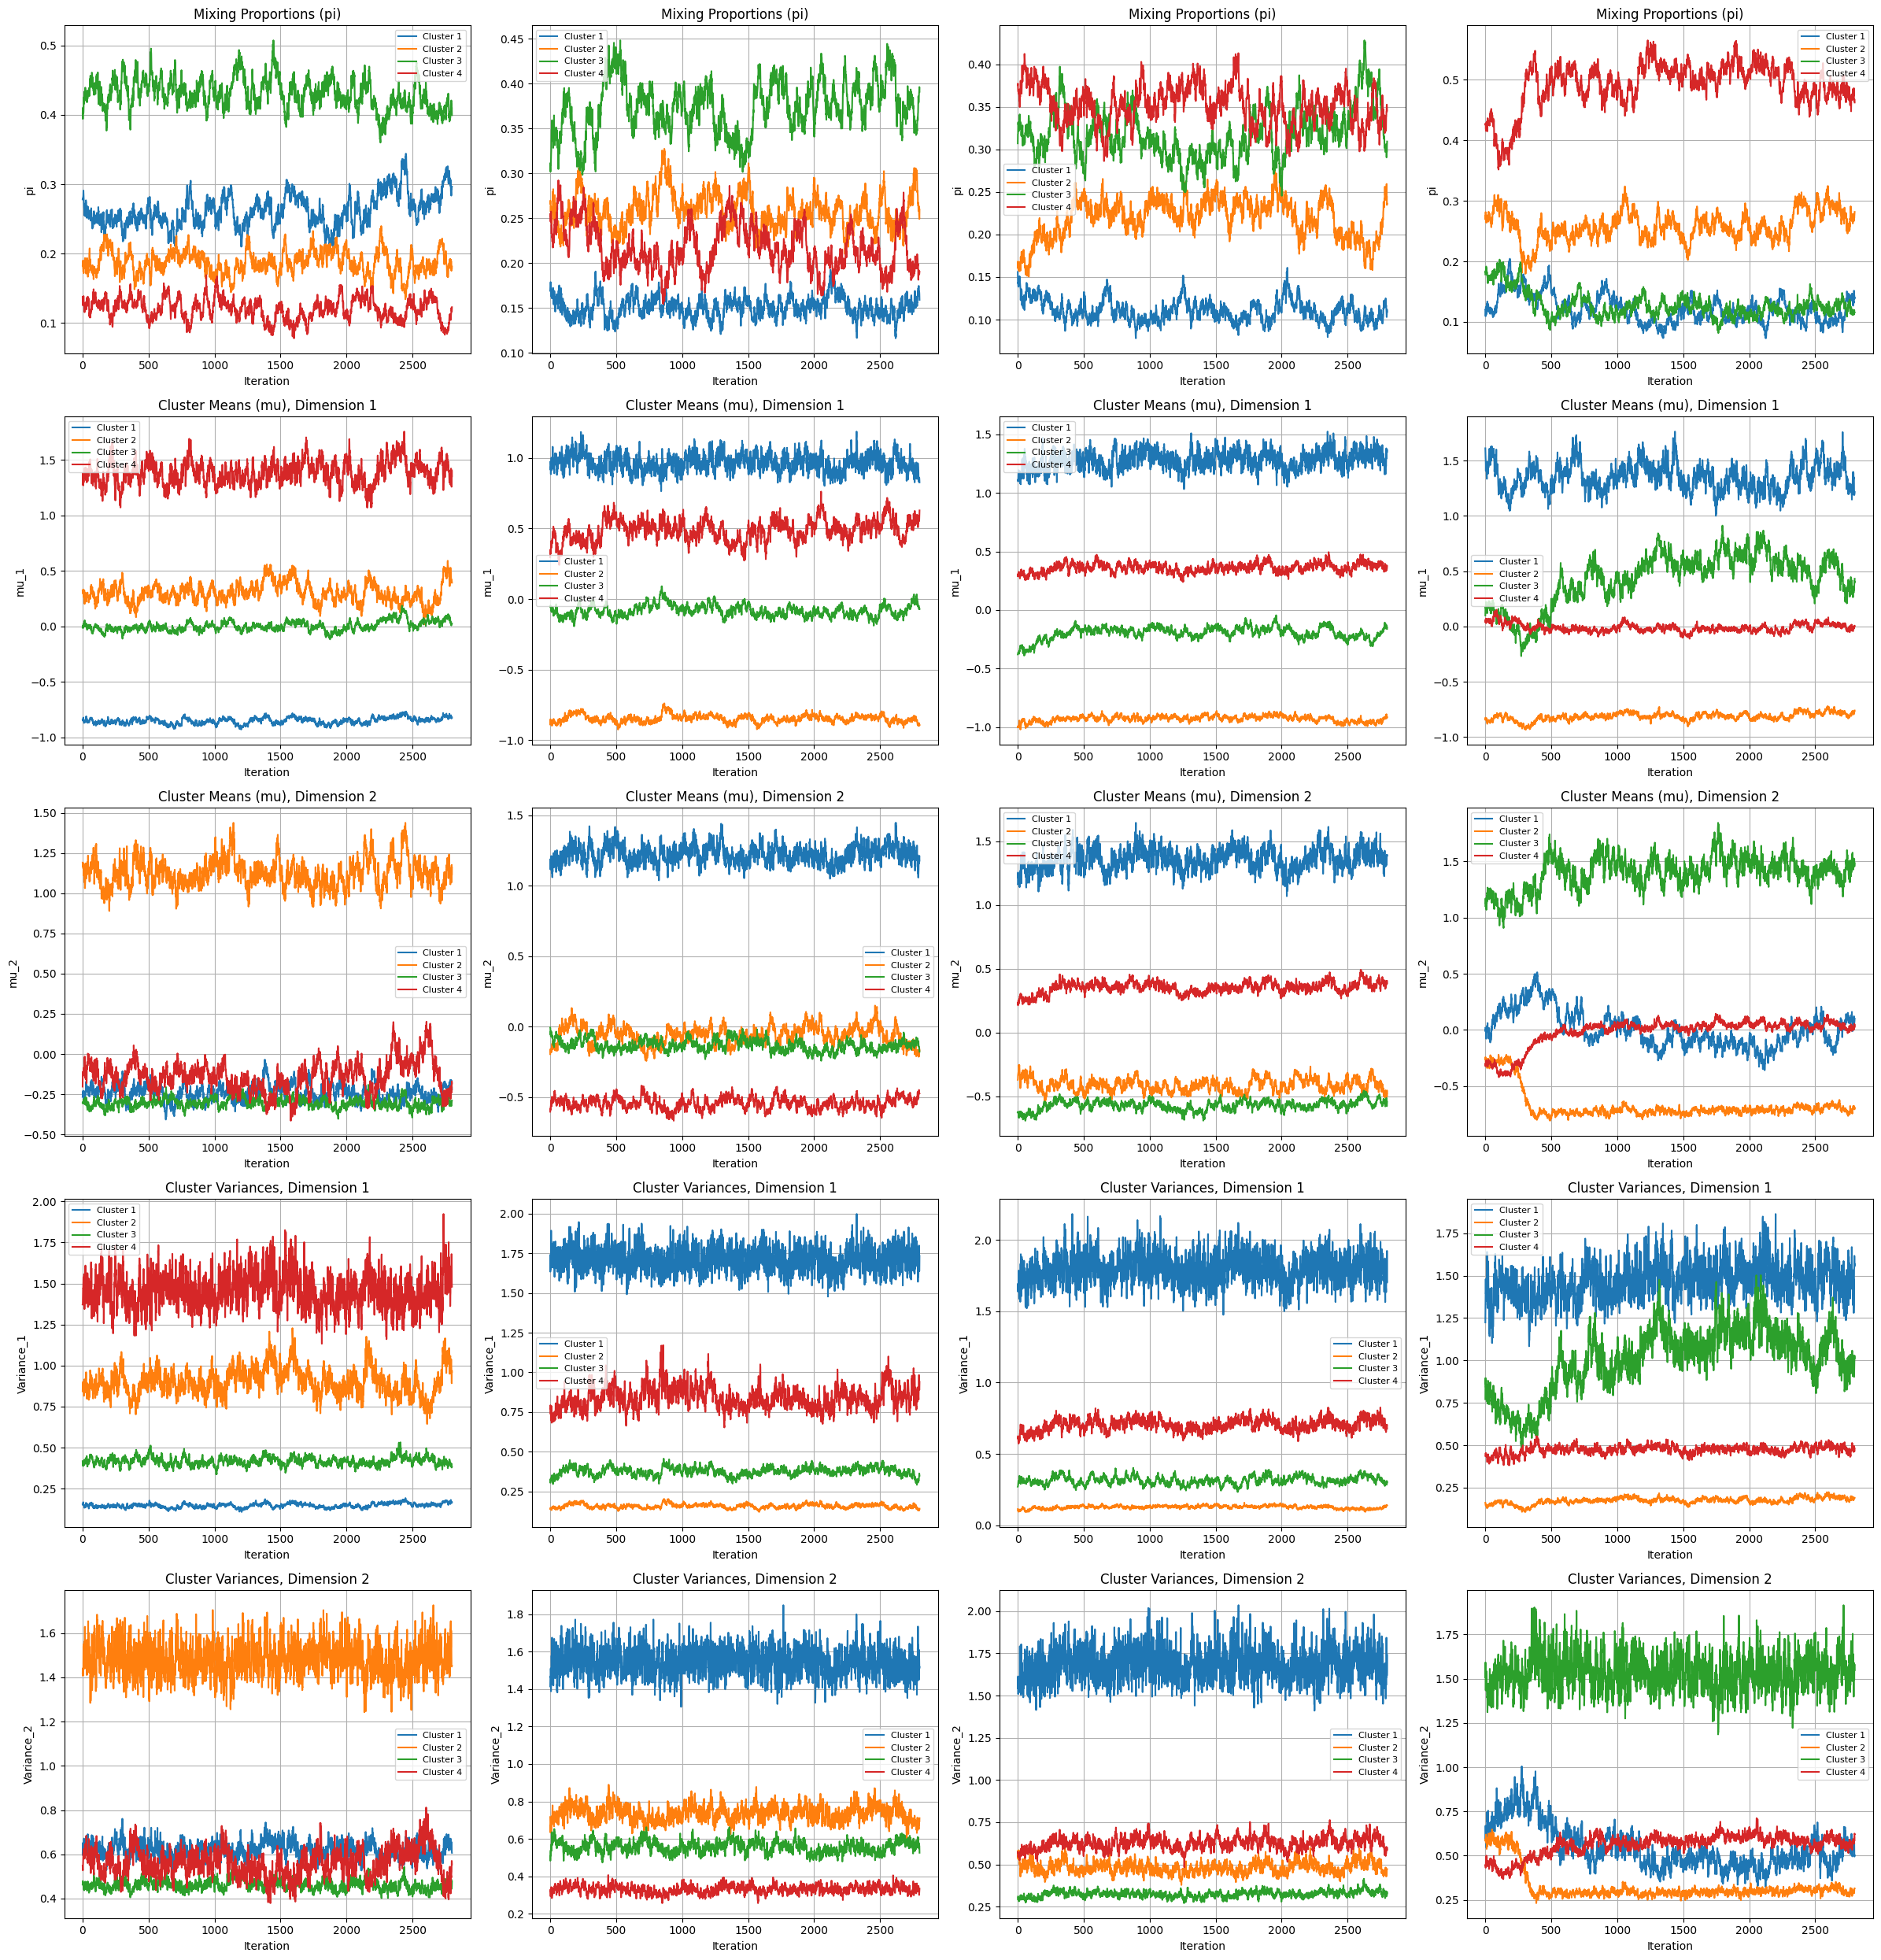

In [8]:
np.random.seed(42)
# Parameters
num_runs = 4
num_iterations = 3000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = gibbs_sampler_gmm_multivariate(X, K, num_iterations,200)
    all_run_samples.append(run_samples)

# --- Trace Plots for All Runs ---
fig_trace, axes_trace = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))
for run in range(num_runs):
    run_samples = all_run_samples[run]
    plot_trace(run_samples, K, axes_trace[:, run])
plt.tight_layout()
plt.show()



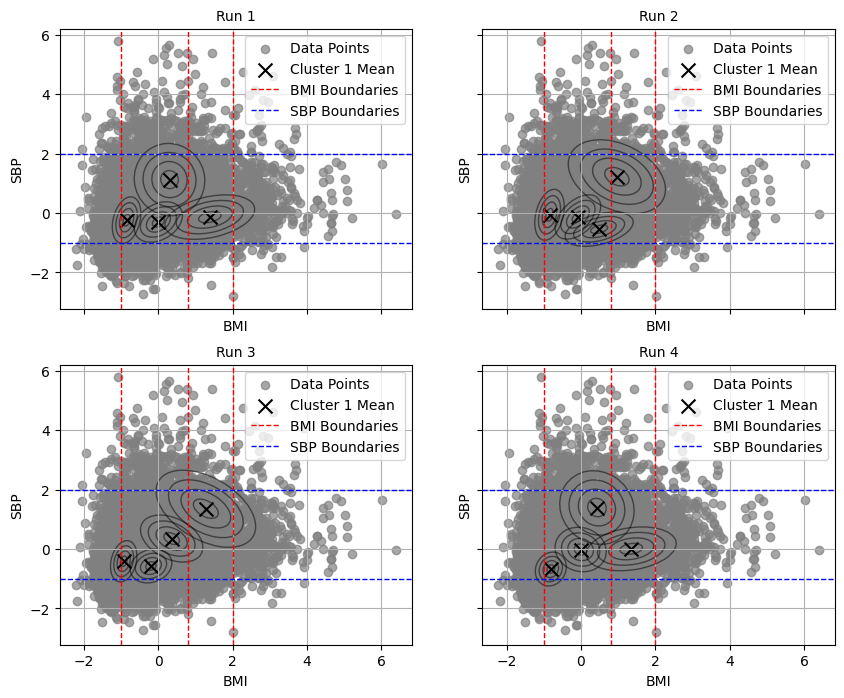

In [9]:

# Plot final clustering with ellipses using the computed posterior estimates
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten()  # Flatten to 1D array for easy iteration

for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Extract cluster means
    sigma_samples = np.array([s[2] for s in run_samples])  # Extract cluster covariances
    # Plot the clustering with confidence ellipses on the given axis.
    plot_with_reference_lines(mu_samples, sigma_samples, X, bmi_bounds, sbp_bounds, ax=ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)


Running Gibbs Sampler for Run 1


Sampling:   0%|          | 0/20000 [00:00<?, ?it/s]/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:133: RuntimeWarning: invalid value encountered in log
  + np.log(h(proposed_mu))
/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:137: RuntimeWarning: invalid value encountered in log
  + np.log(h(mu))
Sampling: 100%|██████████| 20000/20000 [01:00<00:00, 330.19it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 20000/20000 [01:00<00:00, 331.30it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 20000/20000 [01:01<00:00, 324.48it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 20000/20000 [01:02<00:00, 322.56it/s]


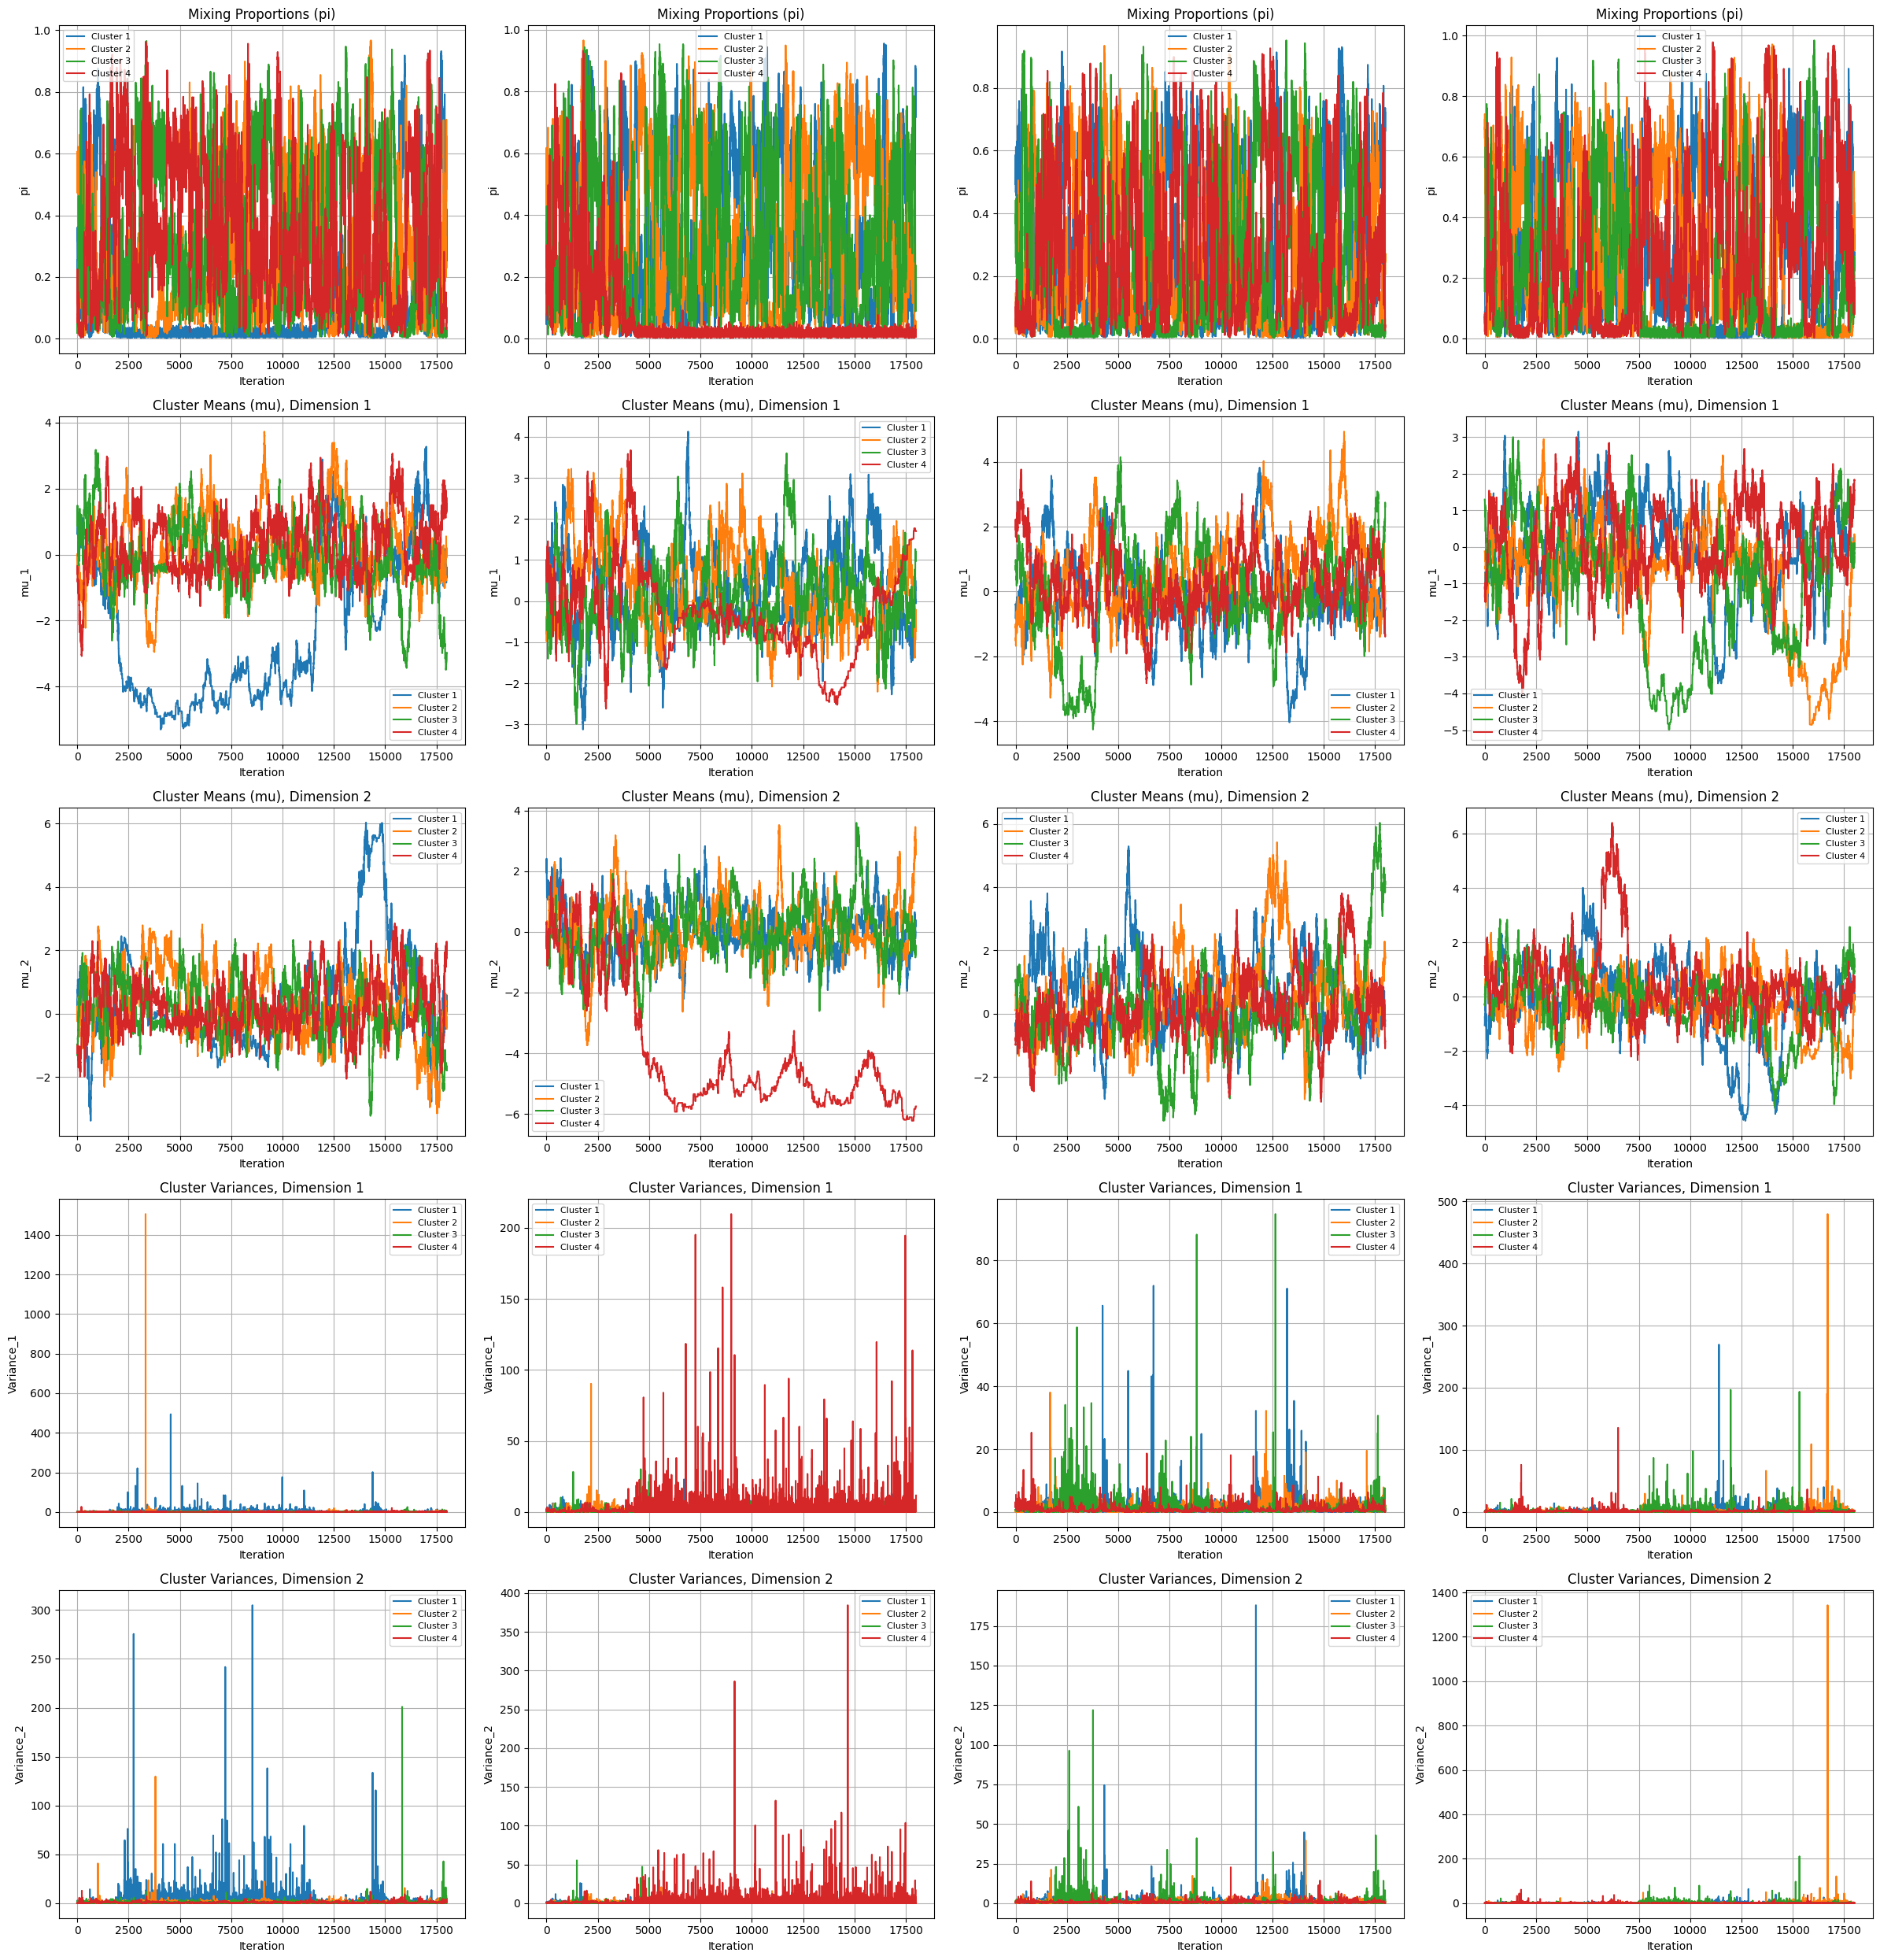

In [37]:
np.random.seed(42)
# Parameters
num_runs = 4
num_iterations = 20000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = bayesian_repulsive(X, K, num_iterations, h1, burn_in=2000)
    all_run_samples.append(run_samples)

# --- Trace Plots for All Runs ---
fig_trace, axes_trace = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))
for run in range(num_runs):
    run_samples = all_run_samples[run]
    plot_trace(run_samples, K, axes_trace[:, run])
plt.tight_layout()
plt.show()



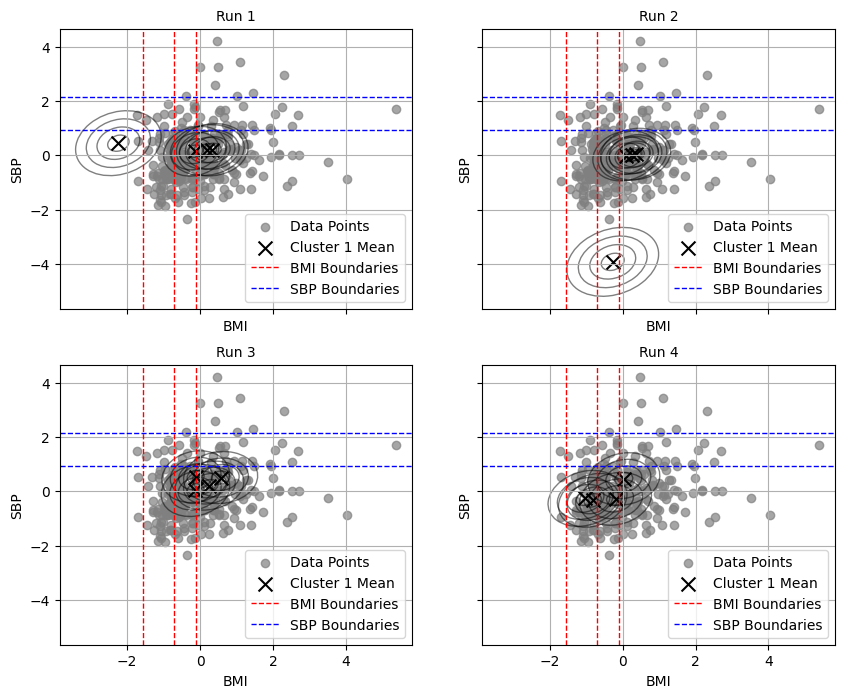

In [38]:

# Plot final clustering with ellipses using the computed posterior estimates
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten()  # Flatten to 1D array for easy iteration

for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Extract cluster means
    sigma_samples = np.array([s[2] for s in run_samples])  # Extract cluster covariances
    # Plot the clustering with confidence ellipses on the given axis.
    plot_with_reference_lines(mu_samples, sigma_samples, X, bmi_bounds, sbp_bounds, ax=ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)


Running Gibbs Sampler for Run 1


Sampling:   0%|          | 0/3000 [00:00<?, ?it/s]/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:133: RuntimeWarning: divide by zero encountered in log
  + np.log(h(proposed_mu))
/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:137: RuntimeWarning: divide by zero encountered in log
  + np.log(h(mu))
/Users/yunjiaqi/Desktop/M4R/Samplers/gibbs_sampler.py:131: RuntimeWarning: invalid value encountered in scalar subtract
  log_acceptance_rate = (
Sampling: 100%|██████████| 3000/3000 [03:30<00:00, 14.22it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 3000/3000 [03:24<00:00, 14.68it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 3000/3000 [03:24<00:00, 14.65it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 3000/3000 [07:00<00:00,  7.13it/s]  


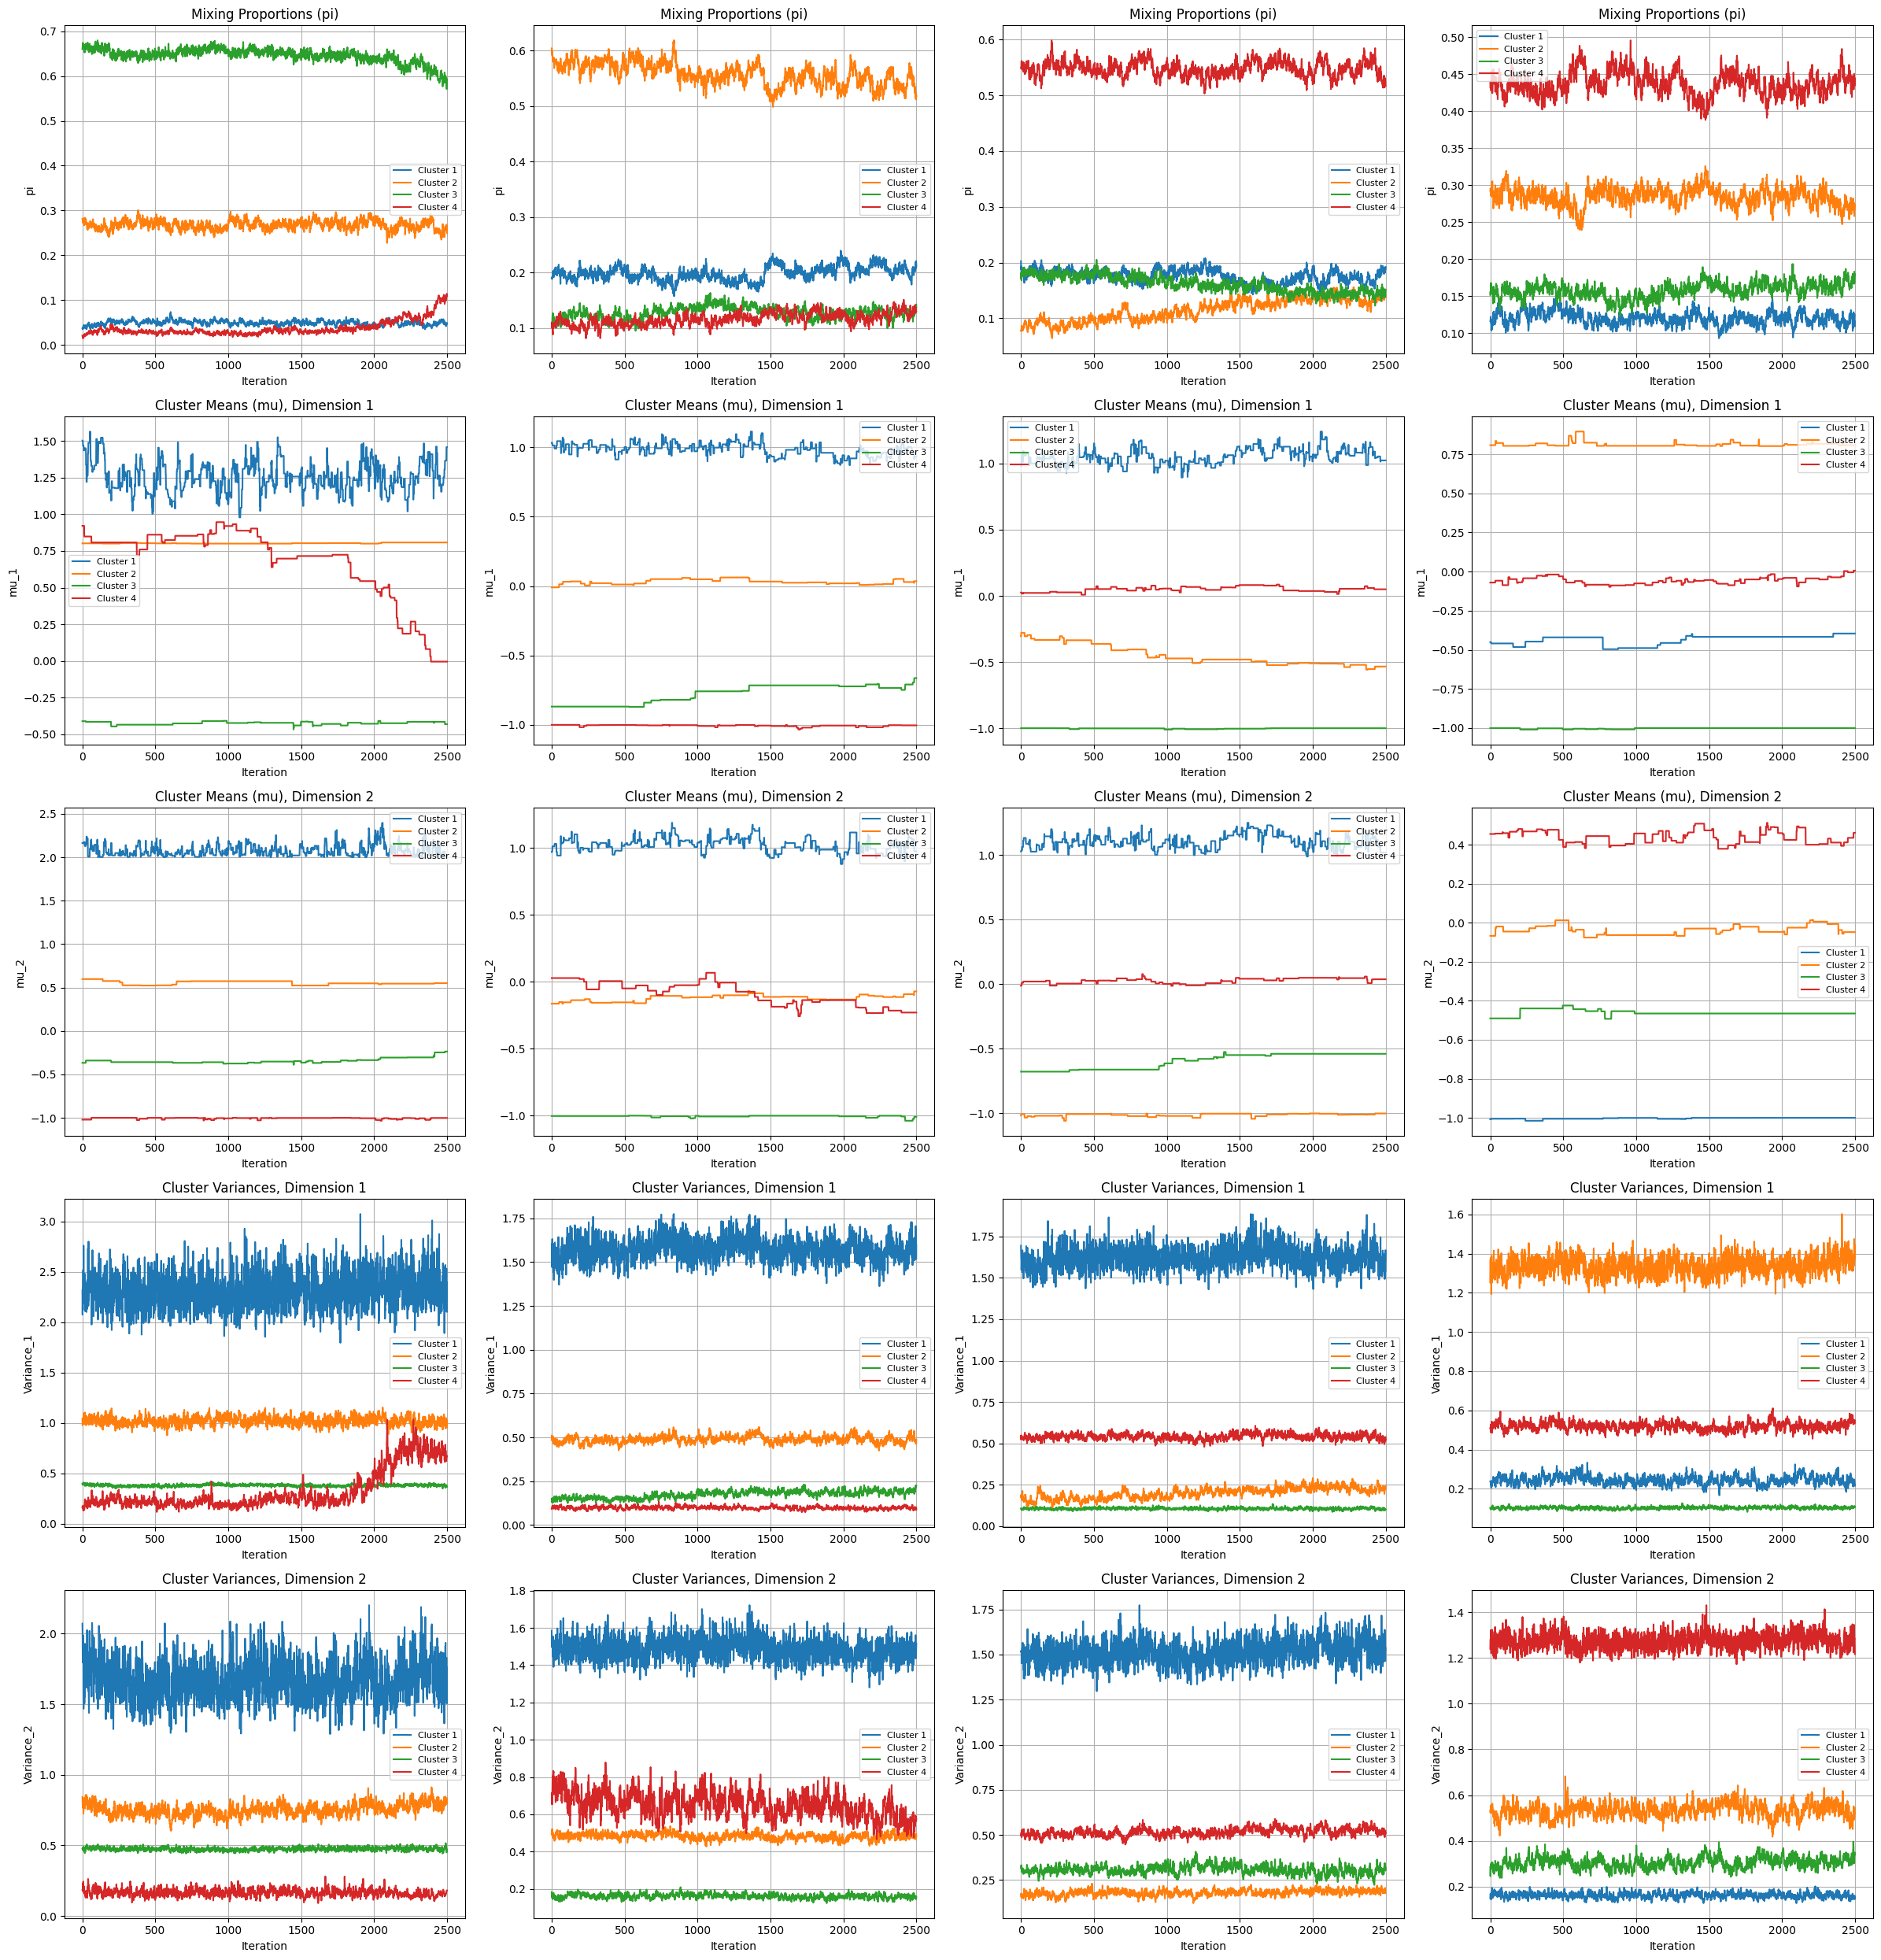

In [14]:
# np.random.seed(42)
# Parameters
num_runs = 4
num_iterations = 3000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy() 

all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = bayesian_repulsive(X, K, num_iterations, h2, burn_in=500)
    all_run_samples.append(run_samples)

# --- Trace Plots for All Runs ---
fig_trace, axes_trace = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))
for run in range(num_runs):
    run_samples = all_run_samples[run]
    plot_trace(run_samples, K, axes_trace[:, run])
plt.tight_layout()
plt.show()



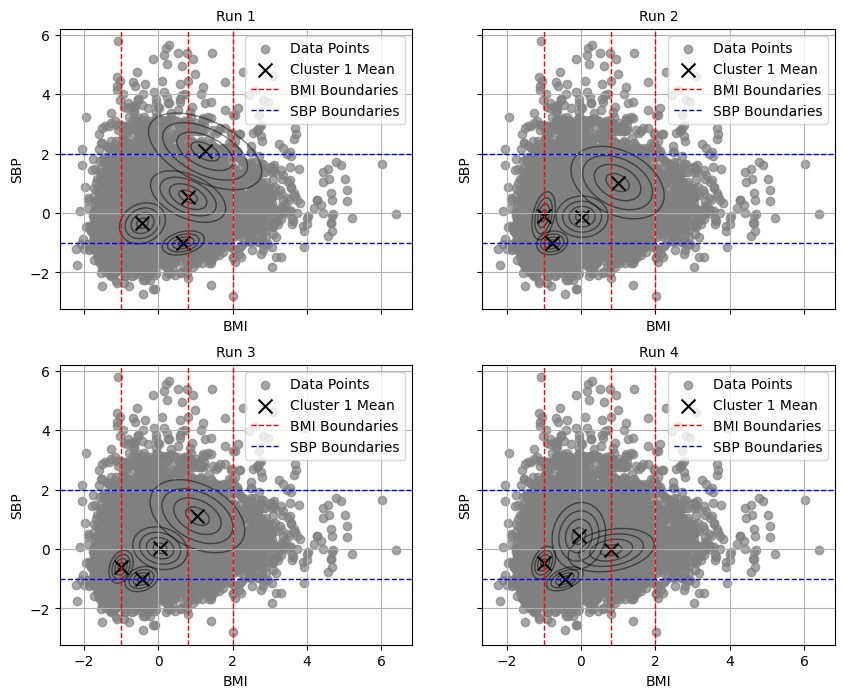

In [15]:

# Plot final clustering with ellipses using the computed posterior estimates
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten()  # Flatten to 1D array for easy iteration

for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Extract cluster means
    sigma_samples = np.array([s[2] for s in run_samples])  # Extract cluster covariances
    # Plot the clustering with confidence ellipses on the given axis.
    plot_with_reference_lines(mu_samples, sigma_samples, X, bmi_bounds, sbp_bounds, ax=ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)


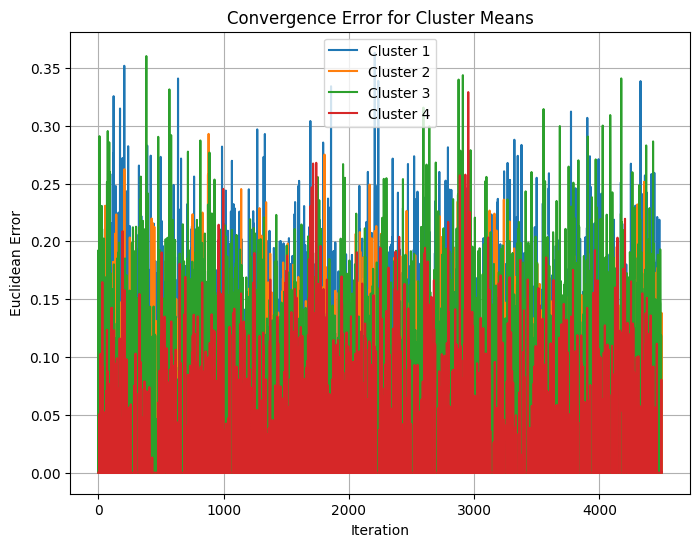

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mu_error(mu_samples):
    """
    Compute the error (Euclidean norm) between successive iterations of mu.
    
    Parameters:
        mu_samples: ndarray of shape (T, K, p)
            Array of sampled cluster means over T iterations.
    
    Returns:
        errors: ndarray of shape (T-1, K)
            Error for each cluster across successive iterations.
    """
    T, K, p = mu_samples.shape
    errors = np.zeros((T-1, K))
    for t in range(1, T):
        for k in range(K):
            errors[t-1, k] = np.linalg.norm(mu_samples[t, k] - mu_samples[t-1, k])
    return errors

# Suppose you have mu_samples from one run:
# (for instance, extracted as: mu_samples = np.array([s[1] for s in run_samples]))
errors = compute_mu_error(mu_samples)

# Plot the error for each cluster
fig, ax = plt.subplots(figsize=(8, 6))
for k in range(K):
    ax.plot(errors[:, k], label=f'Cluster {k+1}')
ax.set_title("Convergence Error for Cluster Means")
ax.set_xlabel("Iteration")
ax.set_ylabel("Euclidean Error")
ax.legend()
ax.grid()
plt.show()